In [2]:
import qutip as qt 
import numpy as np
import matplotlib.pyplot as plt
import os
import math 
os.chdir('/Users/ngdnhtien/Codespace/bqec@huikhoon')
import utility as ut

%config InlineBackend.figure_formats = ['svg']

In [3]:
pi = np.pi

# Reproducing the drive-induced nonlinarities paper

### The interested Hamiltonian

For now we restrict ourselves to strictly NO DRIVE

In [4]:
omega_10 = (2*pi)*4.936
alpha = (2*pi)*0.168 

r1 = 9.640
r2 = 0.064
r3 = 0.080
r4_squared = 0 
delta_a = r1 * alpha
g_a = -1j* r2 * delta_a 
delta_d = r3 * alpha 
Omega_d = np.sqrt(r4_squared) * delta_d 

omega_c = omega_10 + alpha 
omega_d = omega_10 + delta_d 
omega_a = omega_10 + delta_a

delta_da = omega_d - omega_a
delta_dc = omega_d - omega_c

In [5]:
def H_RWA(dimAncilla, dimCavity, r1=9.640, r2=0.064, r3=0.080, r4_squared=0.000):
    """ 
        Args:
            r1: delta)a/alpha - cavity-transmon detuning
            r2: g_a/delta_a - cavity-transmon coupling
            r3: delta_d/alpha - drive-transmon detuning
            r4: |Omega_d/delta_d|^2 = r4^2 - drive amplitude
    """

    omega_10 = (2*pi)*4.936
    alpha = (2*pi)*0.168 

    delta_a = r1 * alpha
    g_a = -1j* r2 * delta_a 
    delta_d = r3 * alpha 
    Omega_d = np.sqrt(r4_squared) * delta_d 

    omega_c = omega_10 + alpha 
    omega_d = omega_10 + delta_d 
    omega_a = omega_10 + delta_a

    delta_da = omega_d - omega_a
    delta_dc = omega_d - omega_c

    a_op = qt.tensor(qt.qeye(dimAncilla), qt.destroy(dimCavity))
    c_op = qt.tensor(qt.destroy(dimAncilla), qt.qeye(dimCavity))

    H = -delta_da * a_op.dag() * a_op -delta_dc * c_op.dag() * c_op - (alpha/2) * (c_op.dag() * c_op + 1) * (c_op.dag() * c_op) +  (Omega_d * c_op.dag() + np.conj(Omega_d) * c_op) \
            + (g_a * a_op * c_op.dag() + np.conj(g_a) * a_op.dag() * c_op)
    
    return H

We check for crossings with increasing number of truncation for the transmon

There are several special points for the cavity: 178. 

In [708]:
r2_range = np.linspace(0.0, 0.1, 100)

eig_energies_wrt_coupling = []
eig_states_wrt_coupling = []

dimAncilla = 9
dimCavity = 120

for r2 in r2_range:
    H_examined = H_RWA(dimAncilla=dimAncilla, dimCavity=dimCavity, r2=r2)
    eig_energies, eig_states = H_examined.eigenstates()
    eig_energies_wrt_coupling.append(eig_energies)
    eig_states_wrt_coupling.append(eig_states)

eig_energies_wrt_coupling = np.array(eig_energies_wrt_coupling)
eig_states_wrt_coupling = np.array(eig_states_wrt_coupling)

In [709]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

for n in np.arange(dimAncilla*dimCavity-10, dimAncilla*dimCavity, 1):
    if (n-(dimAncilla-1))%dimAncilla == 0:
        axes[1].scatter(r2_range, eig_energies_wrt_coupling[:, n], label=f'Level {n}', s=1)
    else:
        axes[1].scatter(r2_range, eig_energies_wrt_coupling[:, n], color='gray', s=1)

# axes[1].set_ylim([485, 500])
axes[1].axhline(eig_energies_wrt_coupling[64][dimAncilla*dimCavity-5], label=f'{np.round(eig_energies_wrt_coupling[64][dimAncilla*dimCavity-5], 3)}')

axes[1].axvline(0.064, linewidth=0.5, color='gray', linestyle='--')

for n in np.arange(0, 10, 1):
    if (n-(dimAncilla-1))%dimAncilla == 0:
        axes[0].scatter(r2_range, eig_energies_wrt_coupling[:, n], label=f'Level {n}', s=1)
    else:
        axes[0].scatter(r2_range, eig_energies_wrt_coupling[:, n], color='gray', s=1)

axes[0].axvline(0.064, linewidth=0.5, color='gray', linestyle='--')

for i in range(2):
    axes[i].legend()

fig.savefig(f'./crossings_{dimCavity}_{dimAncilla}.png', dpi=300)
plt.close()

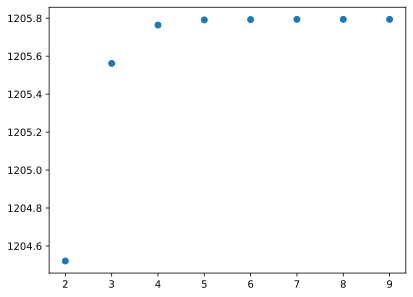

In [710]:
plt.scatter(np.arange(2, 9+1, 1), [1204.521, 1205.562, 1205.764, 1205.791, 1205.793, 1205.794, 1205.794, 1205.794])

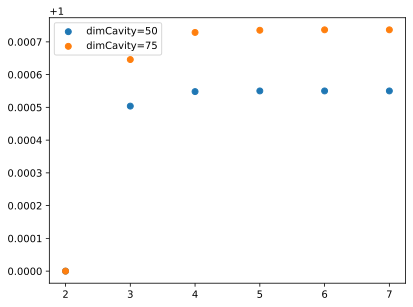

In [44]:
cavity_50 = np.array([496.22, 496.47, 496.492, 496.493, 496.493, 496.493])
cavity_75 = np.array([749.24, 749.724, 749.786, 749.791, 749.792, 749.792])
cavity_120 = np.array([1204.521, ])
# cavity_100 = np.array([1002.194, 1004.094, 1005.259, 1005.958, 1006.192, 1006.215])

plt.scatter(np.arange(2, 7+1, 1), cavity_50/cavity_50[0], label='dimCavity=50')
plt.scatter(np.arange(2, 7+1, 1), cavity_75/cavity_75[0], label='dimCavity=75')
plt.legend()
plt.savefig('./min_dim_transmon_dim_cavity_50_75.png', dpi=300)

# Check labelling

In [1194]:
dimCavity = 200
dimAncilla = 11
r4_squared = 0.25
a_op = qt.tensor(qt.qeye(dimAncilla), qt.destroy(dimCavity))
c_op = qt.tensor(qt.destroy(dimAncilla), qt.qeye(dimCavity))

In [1195]:
H_uncoupled = H_RWA(dimAncilla=dimAncilla, dimCavity=dimCavity, r2=0, r4_squared=r4_squared)

uncoupled_eig_energies, uncoupled_eig_states = H_uncoupled.eigenstates() # saved

#### Label product eigenstates

In [1196]:
basis_state = []

for NA in range(dimCavity):
    for NC in np.arange(dimAncilla-1, -1, -1):
        basis_state.append([qt.tensor(qt.basis(dimAncilla, NC), qt.basis(dimCavity, NA)), [NC, NA]])

In [1197]:
labelled_uncoupled_states = []

radius = dimAncilla+dimCavity

for idx, eig_state in enumerate(uncoupled_eig_states):
    max_fidelity = 0
    for jdx, state in enumerate(basis_state):
        fidelity = qt.fidelity(state[0], eig_state)
        if fidelity > max_fidelity:
            max_fidelity = fidelity 
            label_eig_state = state[1]
            finalized_jdx = jdx
    if max_fidelity < 0.5:
        print('Warning!', idx, jdx, max_fidelity)
    labelled_uncoupled_states.append([eig_state, label_eig_state])

#### Turning on the coupling. $r_2$ small

In [1198]:
H_entangled = H_RWA(dimAncilla=dimAncilla, dimCavity=dimCavity, r4_squared=r4_squared)

entangled_eig_energies, entangled_eig_states = H_entangled.eigenstates()
# entangled_eig_energies = qt.qload('./entangled_eig_energies_2_5000')
# entangled_eig_states = qt.qload('./entangled_eig_states_2_5000')

In [1199]:
labelled_entangled_states = []

for idx, eig_state in enumerate(entangled_eig_states):
    max_fidelity = 0
    for jdx, state in enumerate(labelled_uncoupled_states):
        fidelity = qt.fidelity(state[0], eig_state)
        if fidelity > max_fidelity:
            max_fidelity = fidelity 
            label_eig_state = state[1]
            finalized_jdx = jdx
    if max_fidelity < 0.5:
        print('Warning!', idx, max_fidelity)
    labelled_entangled_states.append([eig_state, label_eig_state])

Warning! 1778 0.4985295854529749
Warning! 1789 0.4965606816846825
Warning! 1800 0.4945815320440167
Warning! 1803 0.4995470405431937
Warning! 1811 0.4925923714489994
Warning! 1815 0.49773242831876546
Warning! 1822 0.49059343147550866
Warning! 1826 0.4959106328007044
Warning! 1833 0.48858494041192135
Warning! 1837 0.494081754217714
Warning! 1844 0.48656712331194163
Warning! 1848 0.49224569750914204
Warning! 1855 0.48454020204723
Warning! 1859 0.4904015495161938
Warning! 1866 0.482504395357552
Warning! 1870 0.48854214403796675
Warning! 1873 0.4985839271993664
Warning! 1877 0.4804599189009797
Warning! 1881 0.4861394039989013
Warning! 1884 0.4966699433531998
Warning! 1888 0.4784069853028648
Warning! 1893 0.48480758280826913
Warning! 1895 0.4947458997000178
Warning! 1899 0.4763458042019941
Warning! 1904 0.4854004507131696
Warning! 1906 0.4928119956233613
Warning! 1910 0.474859380430399
Warning! 1915 0.48641603036724207
Warning! 1917 0.4908684278893562
Warning! 1921 0.4758429433520785
Warning

In [1201]:
crossings_count = 0
energy_fit = []
label_fit = []

for i in range(0, dimCavity):
    if labelled_entangled_states[dimAncilla*i+(dimAncilla-1)][1] != [0, i]:
        print('Index:', dimAncilla*i+(dimAncilla-1))
        print('Supposed to be', [0, i])
        print('Instead', labelled_entangled_states[dimAncilla*i+(dimAncilla-1)][1])
        crossings_count += 1
        for j in range(0, dimAncilla*dimCavity):
            if labelled_entangled_states[j][1] == [0, i]:
                print('Found replacement at', j, labelled_entangled_states[j][1])
                replacement_idx = j
        energy_fit.append(entangled_eig_energies[replacement_idx])
        label_fit.append(labelled_entangled_states[replacement_idx][1])
        print('---')
    else:
        energy_fit.append(entangled_eig_energies[dimAncilla*i+(dimAncilla-1)])
        label_fit.append(labelled_entangled_states[dimAncilla*i+(dimAncilla-1)][1])
        
print('Crossing counts', crossings_count)

Index: 10
Supposed to be [0, 0]
Instead [6, 0]
Found replacement at 24 [0, 0]
---
Index: 21
Supposed to be [0, 1]
Instead [5, 1]
Found replacement at 35 [0, 1]
---
Index: 32
Supposed to be [0, 2]
Instead [5, 2]
Found replacement at 46 [0, 2]
---
Index: 43
Supposed to be [0, 3]
Instead [5, 3]
Found replacement at 57 [0, 3]
---
Index: 54
Supposed to be [0, 4]
Instead [5, 4]
Found replacement at 69 [0, 4]
---
Index: 65
Supposed to be [0, 5]
Instead [5, 5]
Found replacement at 80 [0, 5]
---
Index: 76
Supposed to be [0, 6]
Instead [5, 6]
Found replacement at 91 [0, 6]
---
Index: 87
Supposed to be [0, 7]
Instead [5, 7]
Found replacement at 102 [0, 7]
---
Index: 98
Supposed to be [0, 8]
Instead [5, 8]
Found replacement at 113 [0, 8]
---
Index: 109
Supposed to be [0, 9]
Instead [5, 9]
Found replacement at 124 [0, 9]
---
Index: 120
Supposed to be [0, 10]
Instead [10, 14]
Found replacement at 135 [0, 10]
---
Index: 131
Supposed to be [0, 11]
Instead [2, 10]
Found replacement at 146 [0, 11]
---
I

In [1202]:
for i in range(dimCavity):
    if label_fit[i][1] != i:
        print('Warning...')

In [1203]:
energy_fit_small = [energy_fit[i]/(2*np.pi) for i in range(len(energy_fit))]

#### First order

In [1204]:
NA_fit = np.arange(0, dimCavity, 1)[:-1]
E1_fit = energy_fit_small[:-1]
E1_fit = E1_fit - E1_fit[0]

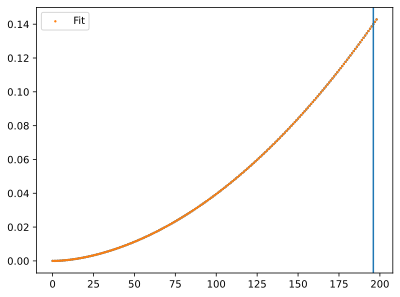

In [1219]:
deg_popt1 = 10
popt1 = np.polyfit(NA_fit, E1_fit, deg_popt1, full=True)
c1 = popt1[0]
p1 = np.poly1d(c1)

E2_fit = []
for i in range(dimCavity-1):
    E2_fit.append(E1_fit[i]-c1[deg_popt1-1]*i)
    
deg_popt2 = 14   
popt2 = np.polyfit(NA_fit, E2_fit, deg_popt2, full=True)
c2 = popt2[0]
p2 = np.poly1d(c2)

E3_fit = []
for i in range(dimCavity-1):
    E3_fit.append(E1_fit[i]-c1[deg_popt1-1]*i-c2[deg_popt2-1]*i**2)
    
deg_popt3 = 14  
popt3 = np.polyfit(NA_fit, E3_fit, deg_popt3, full=True)
c3 = popt3[0]
p3 = np.poly1d(c3)

E4_fit = []
for i in range(dimCavity-1):
    E4_fit.append(E1_fit[i]-c1[deg_popt1-1]*i-c2[deg_popt2-1]*i**2-c3[deg_popt3-1]*i**3)
    
deg_popt4 = 14   
popt4 = np.polyfit(NA_fit, E4_fit, deg_popt4, full=True)
c4 = popt4[0]
p4 = np.poly1d(c4)

plt.scatter(NA_fit, E3_fit, s=2)
plt.axvline(196)
plt.scatter(NA_fit, [p3(NA) for NA in NA_fit],label='Fit', s=2)
plt.legend()

In [1220]:
base = 2.63e-06

In [1221]:
c1[deg_popt1-1], c2[deg_popt2-2]*2/base, 10*c3[deg_popt3-3]*math.factorial(3)/base, 100*c4[deg_popt4-4]*math.factorial(4)/base

(1.6125849270463368, 2.8120074339229553, -4.47940368364687, 5.650939411424724)

# Script 

In [1222]:
def compute_Kerr(dimAncilla, dimCavity, r4_squared):

    H_uncoupled = H_RWA(dimAncilla=dimAncilla, dimCavity=dimCavity, r2=0, r4_squared=r4_squared)
    _, uncoupled_eig_states = H_uncoupled.eigenstates() 
    
    basis_state = []

    for NA in range(dimCavity):
        for NC in np.arange(dimAncilla-1, -1, -1):
            basis_state.append([qt.tensor(qt.basis(dimAncilla, NC), qt.basis(dimCavity, NA)), [NC, NA]])

    labelled_uncoupled_states = []

    for idx, eig_state in enumerate(uncoupled_eig_states):
        max_fidelity = 0
        for jdx, state in enumerate(basis_state):
            fidelity = qt.fidelity(state[0], eig_state)
            if fidelity > max_fidelity:
                max_fidelity = fidelity 
                label_eig_state = state[1]
                finalized_jdx = jdx
        if max_fidelity < 0.5:
            print('Warning!', idx, jdx, max_fidelity, finalized_jdx)
        labelled_uncoupled_states.append([eig_state, label_eig_state])

    H_entangled = H_RWA(dimAncilla=dimAncilla, dimCavity=dimCavity, r4_squared=r4_squared)

    entangled_eig_energies, entangled_eig_states = H_entangled.eigenstates()

    labelled_entangled_states = []

    for idx, eig_state in enumerate(entangled_eig_states):
        max_fidelity = 0
        for jdx, state in enumerate(labelled_uncoupled_states):
            fidelity = qt.fidelity(state[0], eig_state)
            if fidelity > max_fidelity:
                max_fidelity = fidelity 
                label_eig_state = state[1]
                finalized_jdx = jdx
        if max_fidelity < 0.5:
            print('Warning: labelling entangled states', max_fidelity, idx)
        labelled_entangled_states.append([eig_state, label_eig_state])

    crossings_count = 0
    energy_fit = []
    label_fit = []

    for i in range(0, dimCavity):
        if labelled_entangled_states[dimAncilla*i+(dimAncilla-1)][1] != [0, i]:
            crossings_count += 1
            for j in range(0, dimAncilla*dimCavity):
                if labelled_entangled_states[j][1] == [0, i]:
                    replacement_idx = j
            energy_fit.append(entangled_eig_energies[replacement_idx])
            label_fit.append(labelled_entangled_states[replacement_idx][1])
        else:
            energy_fit.append(entangled_eig_energies[dimAncilla*i+(dimAncilla-1)])
            label_fit.append(labelled_entangled_states[dimAncilla*i+(dimAncilla-1)][1])
    print(crossings_count)
    for i in range(dimCavity):
        if label_fit[i][1] != i: 
            print('Warning: Label is not continuous')

    energy_fit_small = [energy_fit[i]/(2*np.pi) for i in range(len(energy_fit))]
    NA_fit = np.arange(0, dimCavity, 1)[:-1]
    E1_fit = energy_fit_small[:-1]
    E1_fit = E1_fit - E1_fit[0]

    deg_popt1 = 10
    popt1 = np.polyfit(NA_fit, E1_fit, deg_popt1, full=True)
    c1 = popt1[0]
    p1 = np.poly1d(c1)

    E2_fit = []
    for i in range(dimCavity-1):
        E2_fit.append(E1_fit[i]-c1[deg_popt1-1]*i)
        
    deg_popt2 = 14   
    popt2 = np.polyfit(NA_fit, E2_fit, deg_popt2, full=True)
    c2 = popt2[0]
    p2 = np.poly1d(c2)

    E3_fit = []
    for i in range(dimCavity-1):
        E3_fit.append(E1_fit[i]-c1[deg_popt1-1]*i-c2[deg_popt2-1]*i**2)
        
    deg_popt3 = 14   
    popt3 = np.polyfit(NA_fit, E3_fit, deg_popt3, full=True)
    c3 = popt3[0]
    p3 = np.poly1d(c3)

    E4_fit = []
    for i in range(dimCavity-1):
        E4_fit.append(E1_fit[i]-c1[deg_popt1-1]*i-c2[deg_popt2-1]*i**2-c3[deg_popt3-1]*i**3)
        
    deg_popt4 = 14   
    popt4 = np.polyfit(NA_fit, E4_fit, deg_popt4, full=True)
    c4 = popt4[0]
    p4 = np.poly1d(c4)

    return [c1[deg_popt1-1], c2[deg_popt2-2]*2/base, 10*c3[deg_popt3-3]*math.factorial(3)/base, 100*c4[deg_popt4-4]*math.factorial(4)/base]

In [1223]:
quadratic_fit = []
cubic_fit = []
quartic_fit = []
dimAncilla = 11
dimCavity = 200
for r4_squared_val in np.linspace(0, 2.0, 25):
    popt = compute_Kerr(dimAncilla=dimAncilla, dimCavity=dimCavity, r4_squared=r4_squared_val)
    quadratic_fit.append(popt[1])
    cubic_fit.append(popt[2])
    quartic_fit.append(popt[3])

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


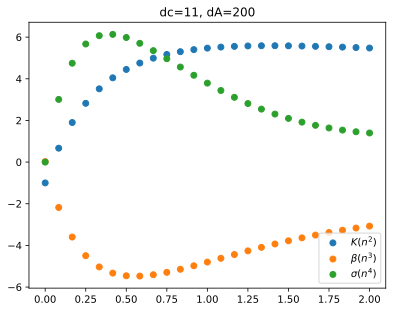

In [1225]:
base_val = quadratic_fit[0]
quadratic_fit_scaled = np.array(quadratic_fit)/np.abs(base_val)
cubic_fit_scaled = np.array(cubic_fit)/np.abs(base_val)
quartic_fit_scaled = np.array(quartic_fit)/np.abs(base_val)
plt.scatter(np.linspace(0, 2.0, 25), quadratic_fit_scaled, label=r'$K (n^2)$')
plt.scatter(np.linspace(0, 2.0, 25), cubic_fit_scaled, label=r'$\beta (n^3)$')
plt.scatter(np.linspace(0, 2.0, 25), quartic_fit_scaled, label=r'$\sigma (n^4)$')
plt.title(f'dc={dimAncilla}, dA={dimCavity}')
plt.legend()
# plt.savefig(f'./{dimAncilla}_{dimCavity}.png',dpi=300)